In [1]:
import pandas as pd

# Load the cleaned dataset
spam_labeled_emails_df = pd.read_csv('spam_labeled_emails.csv')
spam_labeled_emails_df.head(10)

,Body,Category
0,plus stressfree holiday flawless gift set ͏ ͏ ...,spam
1,goibibo here’s claim offer follow u download g...,spam
2,save 85 clearance mark calendar sephora cyber ...,spam
3,here reminder start watching rish man inside 2...,ham
4,google cloud­ deploy prebuilt google cloud sol...,ham
5,share thought feedback honour commitment view ...,ham
6,0,ham
7,click unsubscribe newsletter,ham
8,temu properly view full message content please...,spam
9,story rishitha pusapati pusapatirishitha98 ·be...,spam


# Remove Repeated or Redundant Characters

In [2]:
import re

# Ensure all values in the 'Body' column are strings
spam_labeled_emails_df['Body'] = spam_labeled_emails_df['Body'].apply(lambda x: re.sub(r'Í|â€¢|[Íâ€¢ÍÂ]', '', str(x)))


# Handle Encoding Issues

In [3]:
import unicodedata

def normalize_text(text):
    return unicodedata.normalize('NFKD', text)

spam_labeled_emails_df['Body'] = spam_labeled_emails_df['Body'].apply(normalize_text)

# Remove URLs and Email Addresses

In [4]:
spam_labeled_emails_df['Body'] = spam_labeled_emails_df['Body'].str.replace(r'http\S+|www.\S+', '', regex=True)


In [5]:
spam_labeled_emails_df['Body'] = spam_labeled_emails_df['Body'].str.replace(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', regex=True)


# Adding spam feature

In [6]:
# adding spam feature
spam_labeled_emails_df['Spam'] = spam_labeled_emails_df['Category'].apply(lambda x:1 if x=='spam' else 0)
spam_labeled_emails_df = spam_labeled_emails_df[['Body', 'Spam']]
spam_labeled_emails_df.head()

,Body,Spam
0,plus stressfree holiday flawless gift set ͏ ͏ ...,1
1,goibibo here’s claim offer follow u download g...,1
2,save 85 clearance mark calendar sephora cyber ...,1
3,here reminder start watching rish man inside 2...,0
4,google cloud­ deploy prebuilt google cloud sol...,0


# Feature Extraction

 ### 1. Bag-of-Words (BoW): Count vectorization of word occurrences

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Transform the text data into numerical features
X_bow = vectorizer.fit_transform(spam_labeled_emails_df['Body'])

# Convert to DataFrame for easier viewing
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW representation
print(bow_df.head())


C:\Users\rajuk\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


   00  000  00002359  000035coimbatorekaniyurh  000052657604  0008000401038  \
0   0    0         0                         0             0              0   
1   0    0         0                         0             0              0   
2   0    0         0                         0             0              0   
3   0    0         0                         0             0              0   
4   0    0         0                         0             0              0   

   0008009191694  000balance  000cancellation  000policiescancellation  ...  \
0              0           0                0                        0  ...   
1              0           0                0                        0  ...   
2              0           0                0                        0  ...   
3              1           0                0                        0  ...   
4              0           0                0                        0  ...   

   హక  로드  박서준  오피스  패스포트  中文  日本語  

 ### 2. Apply TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(spam_labeled_emails_df['Body'])

# Convert to DataFrame for easier viewing
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF representation
print(tfidf_df.head())


    00  000  00002359  000035coimbatorekaniyurh  000052657604  0008000401038  \
0  0.0  0.0       0.0                       0.0           0.0            0.0   
1  0.0  0.0       0.0                       0.0           0.0            0.0   
2  0.0  0.0       0.0                       0.0           0.0            0.0   
3  0.0  0.0       0.0                       0.0           0.0            0.0   
4  0.0  0.0       0.0                       0.0           0.0            0.0   

   0008009191694  000balance  000cancellation  000policiescancellation  ...  \
0       0.000000         0.0              0.0                      0.0  ...   
1       0.000000         0.0              0.0                      0.0  ...   
2       0.000000         0.0              0.0                      0.0  ...   
3       0.104698         0.0              0.0                      0.0  ...   
4       0.000000         0.0              0.0                      0.0  ...   

    హక  로드  박서준  오피스  패스포트   中

# Split The Data into Train and Test Sets:

In [9]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = X_tfidf  # or X_bow, depending on which representation you want to use
y = spam_labeled_emails_df['Spam']  # Assuming 'Spam' is your target variable with 0 or 1 values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1.Bag-of-Words with Support Vector Machine (SVM)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dataset split
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
bow_pipeline = Pipeline([
    ('bow', CountVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))),  # Bag-of-Words
    ('classifier', SVC(kernel='linear', class_weight='balanced', random_state=42))  # Support Vector Machine
])

# Train the pipeline
bow_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_bow = bow_pipeline.predict(X_test)

# Evaluate the model
print("\nSVM + Bag-of-Words Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bow):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bow))



SVM + Bag-of-Words Model Evaluation:
Accuracy: 0.9657

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2486
           1       0.93      0.93      0.93       808

    accuracy                           0.97      3294
   macro avg       0.95      0.95      0.95      3294
weighted avg       0.97      0.97      0.97      3294



# 2.TF-IDF with Gradient Boosting (XGBoost)

In [31]:
!pip install xgboost


  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dataset split
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))),  # TF-IDF Vectorization
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))  # XGBoost
])

# Train the pipeline
tfidf_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_tfidf = tfidf_pipeline.predict(X_test)

# Evaluate the model
print("\nXGBoost + TF-IDF Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf))


C:\Users\rajuk\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:09:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost + TF-IDF Model Evaluation:
Accuracy: 0.9827

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2486
           1       0.98      0.95      0.96       808

    accuracy                           0.98      3294
   macro avg       0.98      0.97      0.98      3294
weighted avg       0.98      0.98      0.98      3294



# 3.Bag-of-Words with Naive Bayes

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dataset split
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
bow_pipeline = Pipeline([
    ('bow', CountVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))),  # Bag-of-Words
    ('classifier', MultinomialNB())  # Naive Bayes
])

# Train the pipeline
bow_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_bow = bow_pipeline.predict(X_test)

# Evaluate the model
print("\nNaive Bayes + Bag-of-Words Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bow):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bow))



Naive Bayes + Bag-of-Words Model Evaluation:
Accuracy: 0.9126

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2486
           1       0.84      0.79      0.82       808

    accuracy                           0.91      3294
   macro avg       0.89      0.87      0.88      3294
weighted avg       0.91      0.91      0.91      3294



# 4.Word Embeddings with Logistic Regression

In [35]:
!pip install gensim


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from gensim.models import Word2Vec
import numpy as np

# Dataset split
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Word2Vec model
sentences = [text.split() for text in X_train]
word2vec_model = Word2Vec(sentences, vector_size=300, min_count=2, workers=4)

# Helper function to convert text to embeddings
def get_sentence_embedding(sentence):
    words = sentence.split()
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(300)

X_train_emb = np.array([get_sentence_embedding(text) for text in X_train])
X_test_emb = np.array([get_sentence_embedding(text) for text in X_test])

# Train the classifier
classifier = LogisticRegression(class_weight='balanced', random_state=42)
classifier.fit(X_train_emb, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_emb)

# Evaluate the model
print("\nLogistic Regression + Word2Vec Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Logistic Regression + Word2Vec Model Evaluation:
Accuracy: 0.9065

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      2486
           1       0.77      0.89      0.82       808

    accuracy                           0.91      3294
   macro avg       0.86      0.90      0.88      3294
weighted avg       0.91      0.91      0.91      3294



C:\Users\rajuk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Training a Classifier Using RandomForestClassifier with a Pipeline:

## **1.RandomForestClassifier + Bag-of-Words Implementation:** ##

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dataset split
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
bow_pipeline = Pipeline([
    ('bow', CountVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 2))),  # Bag-of-Words Vectorization
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
  # Random Forest
])

# Train the pipeline
bow_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_bow = bow_pipeline.predict(X_test)

# Evaluate the model
print("\nRandom Forest + Bag-of-Words Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bow):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bow))



Random Forest + Bag-of-Words Model Evaluation:
Accuracy: 0.9715

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2486
           1       0.99      0.89      0.94       808

    accuracy                           0.97      3294
   macro avg       0.98      0.95      0.96      3294
weighted avg       0.97      0.97      0.97      3294



## **2.RandomForestClassifier +  TF-IDF Implementation:** ##

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),  # TF-IDF Vectorization
     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42)) # Random Forest with balanced class weights
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nRandom Forest  + TF-IDF  Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest  + TF-IDF  Model Evaluation:
Accuracy: 0.9699

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2486
           1       0.99      0.89      0.94       808

    accuracy                           0.97      3294
   macro avg       0.98      0.94      0.96      3294
weighted avg       0.97      0.97      0.97      3294



# Training a Classifier Using Logistic Regression with a Pipeline:

## **3.Logistic Regression + Bag-of-Words Implementation:** ##

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Dataset split
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
bow_pipeline = Pipeline([
    ('bow', CountVectorizer(max_features=5000, stop_words='english')),  # Bag-of-Words Vectorization
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))  # Logistic Regression
])

# Train the pipeline
bow_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_bow = bow_pipeline.predict(X_test)

# Evaluate the model
print("\nLogistic Regression + Bag-of-Words Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_bow):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bow))



Logistic Regression + Bag-of-Words Model Evaluation:
Accuracy: 0.9702

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2486
           1       0.95      0.93      0.94       808

    accuracy                           0.97      3294
   macro avg       0.96      0.96      0.96      3294
weighted avg       0.97      0.97      0.97      3294



## **4.Logistic Regression + TF-IDF Implementation:** ##

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = spam_labeled_emails_df['Body']
y = spam_labeled_emails_df['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),  # TF-IDF Vectorization
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))  # Logistic Regression with balanced class weights
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("\nLogistic Regression + TF-IDF Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression + TF-IDF Model Evaluation:
Accuracy: 0.9569

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2486
           1       0.91      0.91      0.91       808

    accuracy                           0.96      3294
   macro avg       0.94      0.94      0.94      3294
weighted avg       0.96      0.96      0.96      3294



# Confusion Matrix

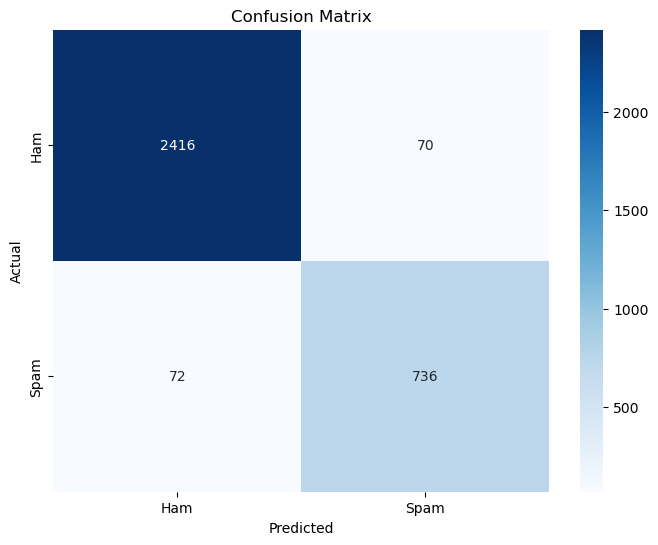

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_pred to string labels ('Ham' and 'Spam')
y_pred_labels = ['Ham' if label == 0 else 'Spam' for label in y_pred]

# Convert y_test to string labels ('Ham' and 'Spam')
y_test_labels = ['Ham' if label == 0 else 'Spam' for label in y_test]

# Generate the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Testing Model with Examples

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Example training data (replace with your actual training data)
train_emails = ["Hello, this is a normal email.", "Congratulations! You've won a prize!", "Let's schedule a meeting tomorrow.", "Special offer just for you!"]
train_labels = [0, 1, 0, 1]  # 0 = Ham, 1 = Spam

# Initialize and fit the TF-IDF Vectorizer on the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_emails)

# Train the model
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, train_labels)

# New emails to classify
new_emails = [
    "Hello, I hope you are doing well. Let's catch up soon!",
    "Limited time offer! Get your free gift card now!",
    "Are you available for a quick meeting tomorrow? Let me know!",
    "Congratulations! You've been selected for a special prize!",
    "Congratulations! You've won a free vacation to Hawaii. Click the link to claim it now.",  # Likely Spam
    "Hi John, can we reschedule our meeting for next week?",  # Not Spam
    "Win a brand-new iPhone by signing up here. Limited time offer!",  # Likely Spam
    "Reminder: Your subscription is about to expire. Renew it to continue using our service.",  # Possible Spam
    "The package you ordered will be delivered by tomorrow."  # Not Spam

]

# Transform the new emails using the fitted vectorizer
new_emails_transformed = vectorizer.transform(new_emails)

# Predict with the trained classifier
predictions = classifier.predict(new_emails_transformed)

# Convert numerical predictions to readable labels
predicted_labels = ['Spam' if label == 1 else 'Ham' for label in predictions]

# Display the results
for email, label in zip(new_emails, predicted_labels):
    print(f"Email: {email}\nPredicted label: {label}\n")


Email: Hello, I hope you are doing well. Let's catch up soon!
Predicted label: Ham

Email: Limited time offer! Get your free gift card now!
Predicted label: Spam

Email: Are you available for a quick meeting tomorrow? Let me know!
Predicted label: Ham

Email: Congratulations! You've been selected for a special prize!
Predicted label: Spam

Email: Congratulations! You've won a free vacation to Hawaii. Click the link to claim it now.
Predicted label: Spam

Email: Hi John, can we reschedule our meeting for next week?
Predicted label: Ham

Email: Win a brand-new iPhone by signing up here. Limited time offer!
Predicted label: Spam

Email: Reminder: Your subscription is about to expire. Renew it to continue using our service.
Predicted label: Ham

Email: The package you ordered will be delivered by tomorrow.
Predicted label: Ham



In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# Example training data (replace with your actual training data)
train_emails = [
    "Hello, this is a normal email.",
    "Congratulations! You've won a prize!",
    "Let's schedule a meeting tomorrow.",
    "Special offer just for you!"
]
train_labels = [0, 1, 0, 1]  # 0 = Ham, 1 = Spam

# Initialize and fit the TF-IDF Vectorizer on the training data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_emails)

# Train the XGBoost classifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
classifier.fit(X_train_tfidf, train_labels)

# New emails to classify
new_emails = [
    "Hello, I hope you are doing well. Let's catch up soon!",
    "Limited time offer! Get your free gift card now!",
    "Are you available for a quick meeting tomorrow? Let me know!",
    "Congratulations! You've been selected for a special prize!",
    "Congratulations! You've won a free vacation to Hawaii. Click the link to claim it now.",  # Likely Spam
    "Hi John, can we reschedule our meeting for next week?",  # Not Spam
    "Win a brand-new iPhone by signing up here. Limited time offer!",  # Likely Spam
    "Reminder: Your subscription is about to expire. Renew it to continue using our service.",  # Possible Spam
    "The package you ordered will be delivered by tomorrow."  # Not Spam
]

# Transform the new emails using the fitted vectorizer
new_emails_transformed = vectorizer.transform(new_emails)

# Predict with the trained classifier
predictions = classifier.predict(new_emails_transformed)

# Convert numerical predictions to readable labels
predicted_labels = ['Spam' if label == 1 else 'Ham' for label in predictions]

# Display the results
for email, label in zip(new_emails, predicted_labels):
    print(f"Email: {email}\nPredicted label: {label}\n")


Email: Hello, I hope you are doing well. Let's catch up soon!
Predicted label: Ham

Email: Limited time offer! Get your free gift card now!
Predicted label: Ham

Email: Are you available for a quick meeting tomorrow? Let me know!
Predicted label: Ham

Email: Congratulations! You've been selected for a special prize!
Predicted label: Ham

Email: Congratulations! You've won a free vacation to Hawaii. Click the link to claim it now.
Predicted label: Ham

Email: Hi John, can we reschedule our meeting for next week?
Predicted label: Ham

Email: Win a brand-new iPhone by signing up here. Limited time offer!
Predicted label: Ham

Email: Reminder: Your subscription is about to expire. Renew it to continue using our service.
Predicted label: Ham

Email: The package you ordered will be delivered by tomorrow.
Predicted label: Ham



C:\Users\rajuk\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:14:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
